In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df=pd.read_csv("VNL2023.csv")

In [5]:
df.head(5)

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


In [6]:
df.tail(5)

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
126,Graven Leonard,Germany,19,0.0,0.0,0.0,0.0,5.92,1.92,L
127,Balaso Fabio,Italy,28,0.0,0.0,0.0,0.0,10.00,5.00,L
128,Nacsimento Maique Reis,Brazil,26,0.0,0.0,0.0,0.0,5.08,2.46,L
129,Garcia Alvarez Yonder Roman,Cuba,30,0.0,0.0,0.0,0.0,4.25,3.25,L
130,Salparov Teodor,Bulgaria,41,0.0,0.0,0.0,0.0,5.00,3.75,L


In [7]:
numeric_cols=df.select_dtypes(include=["int","float"]).columns
corr_matrix=df[numeric_cols].corr()
print(corr_matrix)

              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


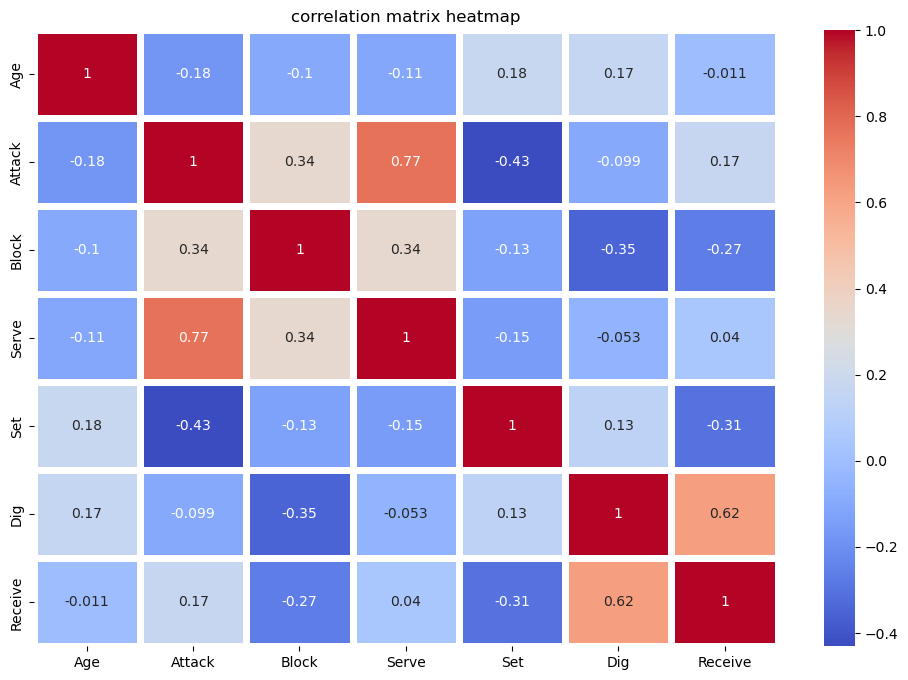

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",linewidths=5)
plt.title("correlation matrix heatmap")
plt.show()

In [9]:
position_counts=df["Position"].value_counts()
print(position_counts)

Position
OH    42
MB    32
OP    25
S     16
L     16
Name: count, dtype: int64


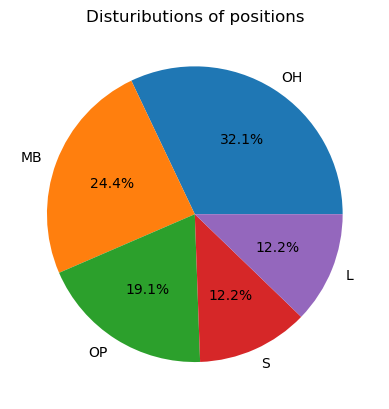

In [10]:
plt.pie(position_counts,labels=position_counts.index,autopct="%1.1f%%")
plt.title("Distuributions of positions")
plt.show()

In [11]:
df.head(5)

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


In [12]:
avg_atk_by_cntry=df.groupby("Country")["Attack"].mean()
avg_atk_by_cntry.sort_values(ascending=False)

Country
France       6.670000
Japan        6.595000
Cuba         6.344286
Serbia       5.998750
Italy        5.965000
Slovenia     5.961250
Argentina    5.925000
Nederland    5.880000
Poland       5.807000
Canada       5.405714
Bulgaria     5.282500
Brazil       5.250000
China        5.093750
Germany      4.833750
Iran         4.707778
USA          4.600000
Name: Attack, dtype: float64

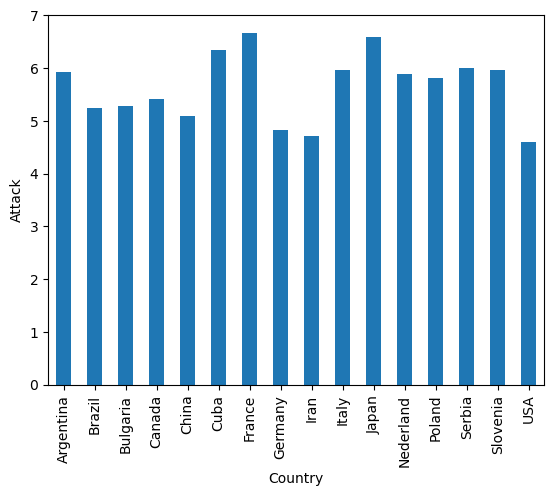

In [13]:
avg_atk_by_cntry.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Attack")
plt.show()

In [14]:
avg_serve_by_age=df.groupby("Age")["Serve"].mean()
avg_serve_by_age.sort_values(ascending=False)

Age
31    0.910000
20    0.880000
21    0.770000
26    0.681053
28    0.667273
35    0.666667
27    0.662500
36    0.660000
24    0.640667
22    0.534286
23    0.526667
29    0.477500
30    0.429231
38    0.400000
33    0.321429
32    0.290000
37    0.270000
19    0.200000
25    0.165714
34    0.026667
41    0.000000
Name: Serve, dtype: float64

In [31]:
df.groupby(["Country","Position"])["Attack"].max().reset_index().head(21).sort_values(ascending=False,by="Attack")

,Country,Position,Attack
12,Bulgaria,OH,14.25
8,Brazil,OP,12.46
7,Brazil,OH,11.85
2,Argentina,OH,11.62
17,Canada,OH,9.75
18,Canada,OP,9.50
3,Argentina,OP,9.15
1,Argentina,MB,7.92
13,Bulgaria,OP,5.75
16,Canada,MB,4.75


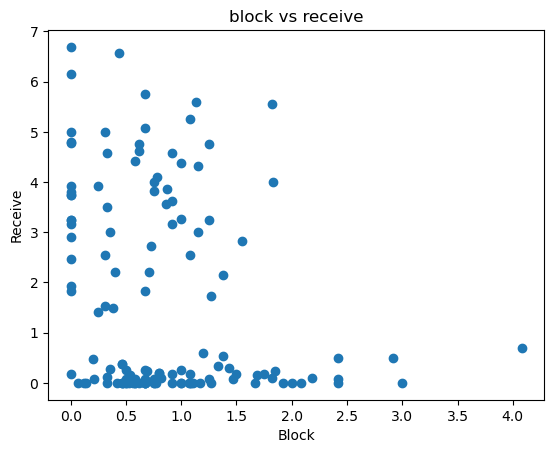

In [33]:
plt.scatter(df["Block"], df["Receive"])
plt.title("block vs receive")
plt.xlabel("Block")
plt.ylabel("Receive")
plt.show()

TypeError: Axes.boxplot() got multiple values for argument 'x'

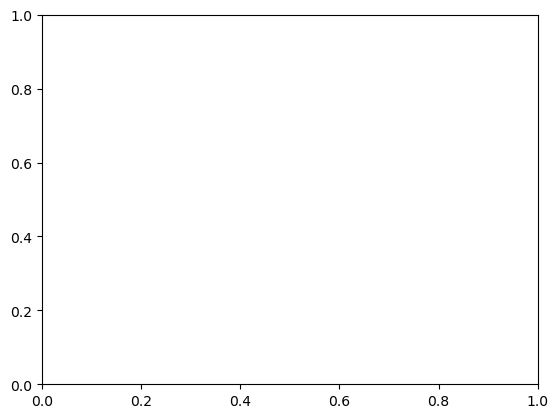

In [47]:
df.boxplot(x=df["Serve"])
plt.title("distribution of serve values")
plt.xlabel("Serve")
plt.show()

In [43]:
df.columns

Index(['Player', 'Country', 'Age', 'Attack', 'Block', 'Serve', 'Set', 'Dig',
       'Receive', 'Position'],
      dtype='object')